In [1]:
# %pip install -r ../requirements.txt

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/WPP2024_Demographic_Indicators_Medium.csv', low_memory=False)
location = 'Europe (48)'
df_by_location = df[df['Location'] == location]

population = df_by_location[['Time', 'TPopulation1Jan']] 
male_deaths = df_by_location[['Time', 'DeathsMale']]
female_deaths = df_by_location[['Time', 'DeathsFemale']]
births = df_by_location[['Time', 'Births']]
deaths = df_by_location[['Time', 'Deaths']]
lex_total = df_by_location[['Time', 'LEx']]
lex_male = df_by_location[['Time', 'LExMale']]
lex_female = df_by_location[['Time', 'LExFemale']]
fertility = df_by_location[['Time', 'TFR']]  
age_childbearing = df_by_location[['Time', 'MAC']]
net_migrations = df_by_location[['Time', 'NetMigrations']]
nat_change = df_by_location[['Time', 'NatChange']]
median_age = df_by_location[['Time', 'MedianAgePop']]
sex_ratio = df_by_location[['Time', 'PopSexRatio']]


regions = [
    'Asia',          
    'Africa',        
    'Europe',        
    'Northern America',  
    'Latin America',  
    'Western Asia',   
    'Northern Africa', 
    'Oceania',       
    'Russian Federation' 
]


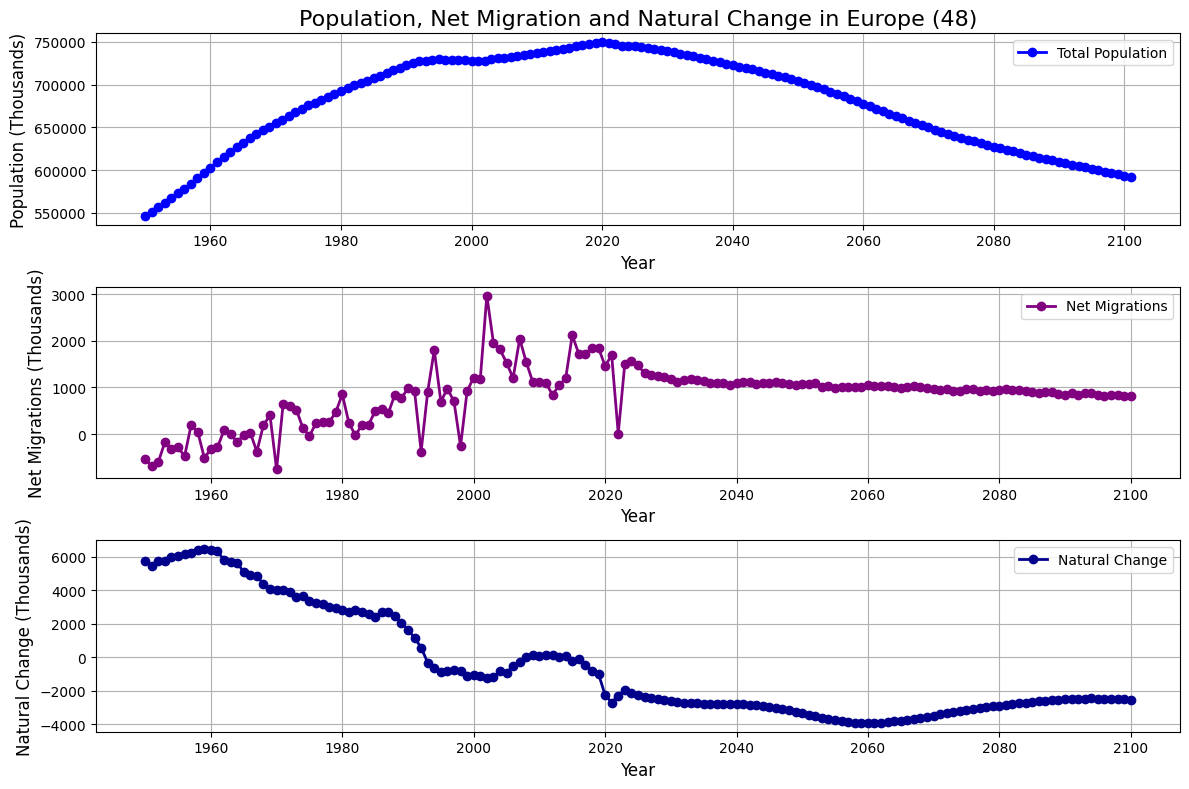

In [4]:
plt.figure(figsize=(12, 8))

# Population
plt.subplot(3, 1, 1)
plt.plot(population['Time'], population['TPopulation1Jan'], color='blue', linewidth=2, marker='o', label='Total Population')
plt.title(f'Population, Net Migration and Natural Change in {location}', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (Thousands)', fontsize=12)
plt.grid(True)
plt.legend()

# Population
plt.subplot(3, 1, 2)
plt.plot(net_migrations['Time'], net_migrations['NetMigrations'], color='purple', linewidth=2, marker='o', label='Net Migrations')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Net Migrations (Thousands)', fontsize=12)
plt.grid(True)
plt.legend()

# Natural Change
plt.subplot(3, 1, 3)
plt.plot(nat_change['Time'], nat_change['NatChange'], color='darkblue', linewidth=2, marker='o', label='Natural Change')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Natural Change (Thousands)', fontsize=12)
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.savefig(f"../charts/{location}_population_net_migration_natural_change.png")

plt.show()


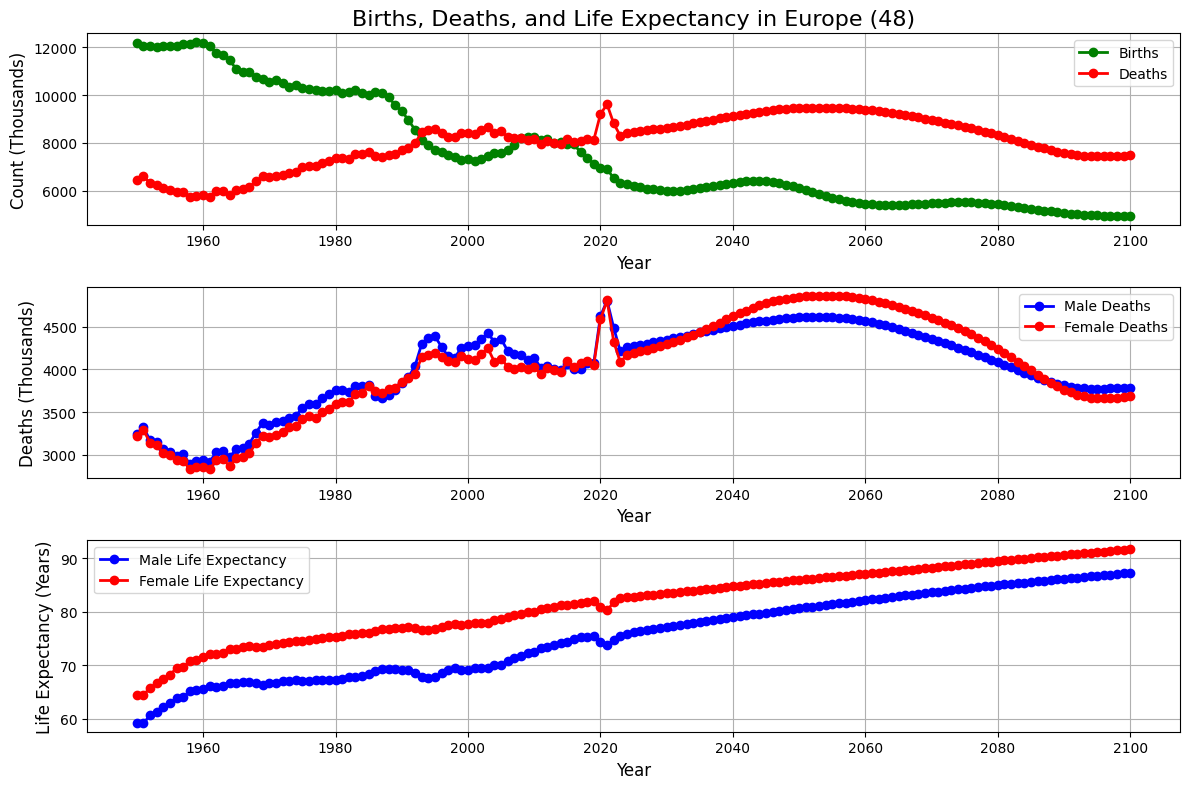

In [5]:
plt.figure(figsize=(12, 8))

# Births, Deaths, and Life Expectancy
plt.subplot(3, 1, 1)
plt.plot(births['Time'], births['Births'], color='green', linewidth=2, marker='o', label='Births')
plt.plot(deaths['Time'], deaths['Deaths'], color='red', linewidth=2, marker='o', label='Deaths')
plt.title(f'Births, Deaths, and Life Expectancy in {location}', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count (Thousands)', fontsize=12)
plt.grid(True)
plt.legend()

# Deaths by gender
plt.subplot(3, 1, 2)
plt.plot(male_deaths['Time'], male_deaths['DeathsMale'], color='blue', linewidth=2, marker='o', label='Male Deaths')
plt.plot(female_deaths['Time'], female_deaths['DeathsFemale'], color='red', linewidth=2, marker='o', label='Female Deaths')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deaths (Thousands)', fontsize=12)
plt.grid(True)
plt.legend()

# Life Expectancy
plt.subplot(3, 1, 3)
plt.plot(lex_male['Time'], lex_male['LExMale'], color='blue', linewidth=2, marker='o', label='Male Life Expectancy')
plt.plot(lex_female['Time'], lex_female['LExFemale'], color='red', linewidth=2, marker='o', label='Female Life Expectancy')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (Years)', fontsize=12)
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.savefig(f"../charts/{location}_births_deaths_life_expectancy.png")

plt.show()


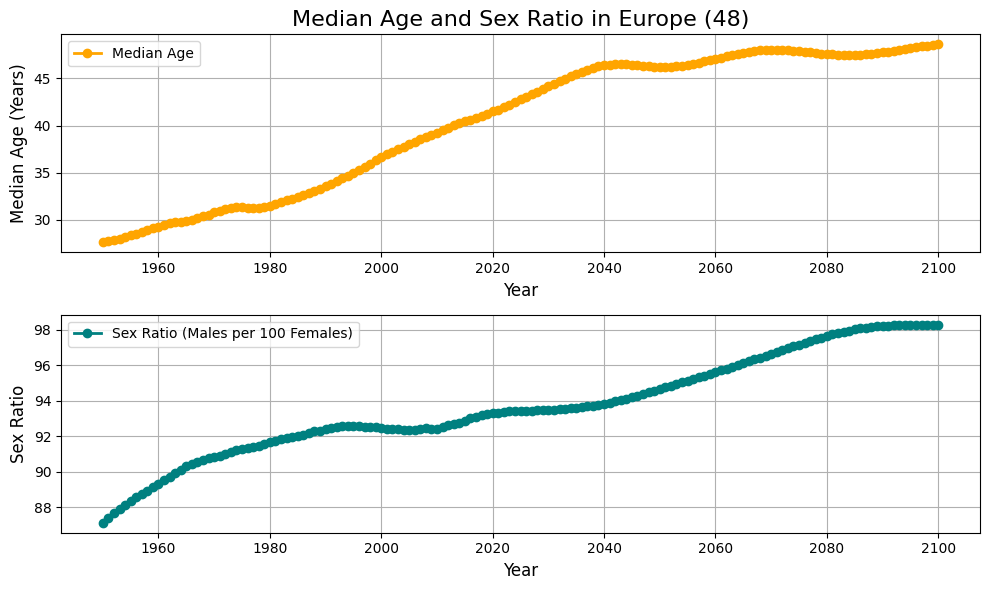

In [6]:
plt.figure(figsize=(10, 6))

# Median Age
plt.subplot(2, 1, 1)
plt.plot(median_age['Time'], median_age['MedianAgePop'], color='orange', linewidth=2, marker='o', label='Median Age')
plt.title(f'Median Age and Sex Ratio in {location}', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Median Age (Years)', fontsize=12)
plt.grid(True)
plt.legend()

# Sex Ratio
plt.subplot(2, 1, 2)
plt.plot(sex_ratio['Time'], sex_ratio['PopSexRatio'], color='teal', linewidth=2, marker='o', label='Sex Ratio (Males per 100 Females)')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sex Ratio', fontsize=12)
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.savefig(f"../charts/{location}_median_age_sex_ratio.png")

plt.show()


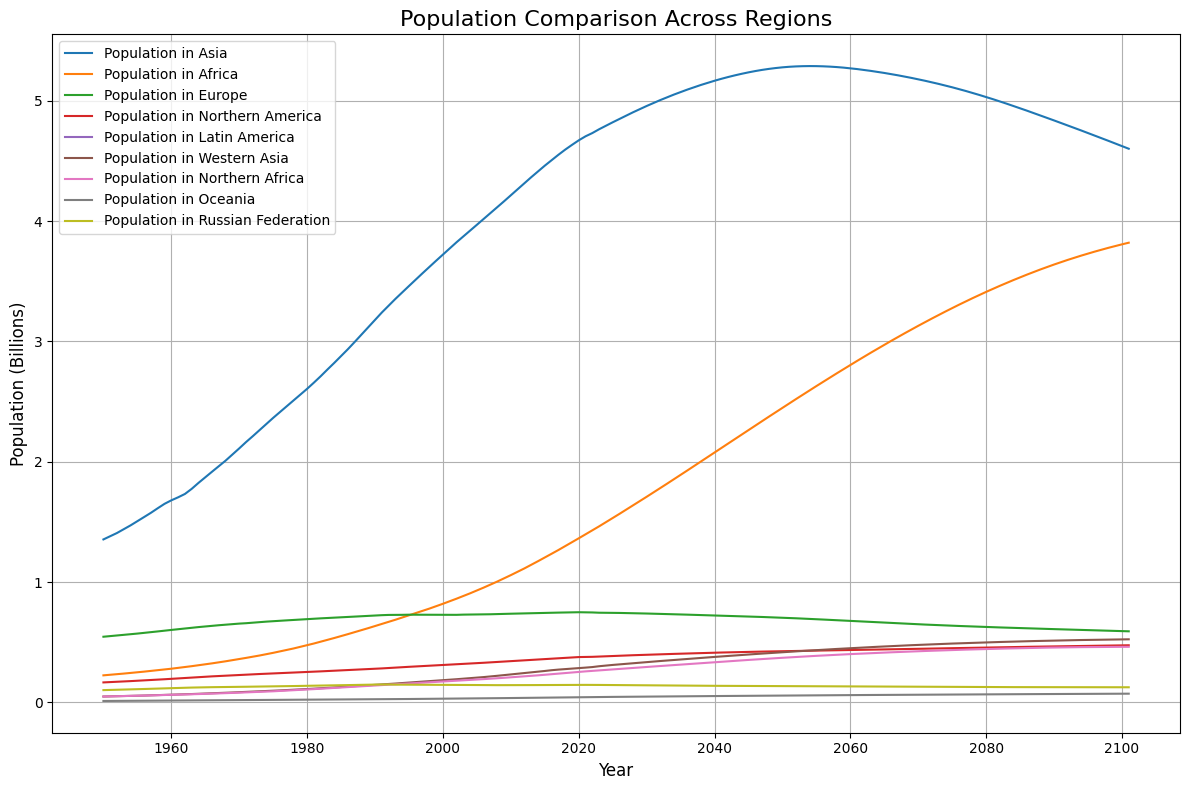

In [16]:
region_data = {}
for region in regions:
    region_data[region] = df[df['Location'] == region]

plt.figure(figsize=(12, 8))
for region in regions:
    population = region_data[region][['Time', 'TPopulation1Jan']].copy()  
    population.loc[:, 'TPopulation1Jan'] = population['TPopulation1Jan'] / 1_000_000  
    
    plt.plot(population['Time'], population['TPopulation1Jan'], label=f'Population in {region}')

plt.title('Population Comparison Across Regions', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (Billions)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

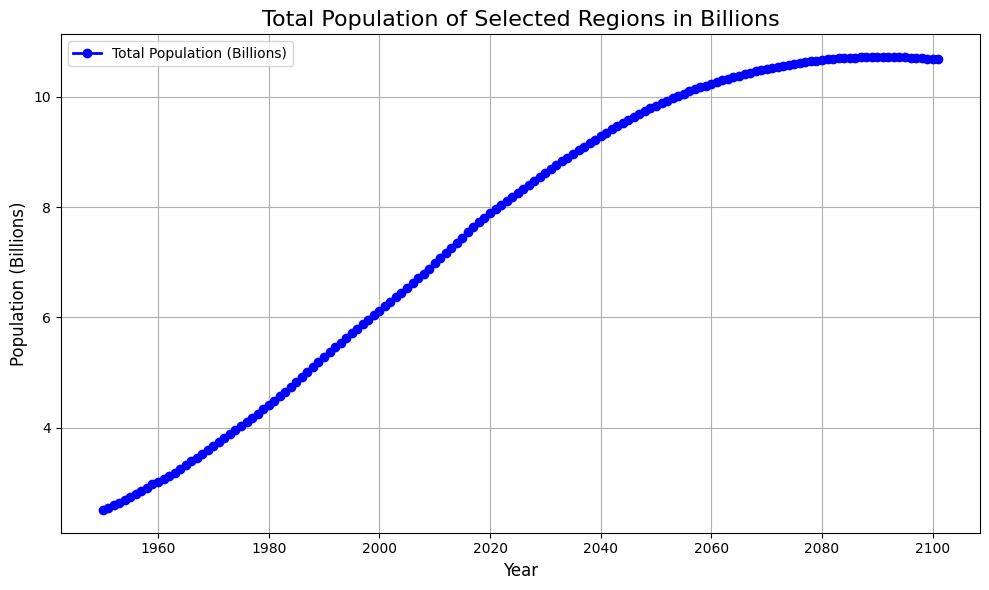

In [10]:

filtered_data = df[df['Location'].isin(regions)]

total_population_by_year = filtered_data.groupby('Time')['TPopulation1Jan'].sum().reset_index()
total_population_by_year['TPopulation1Jan'] = total_population_by_year['TPopulation1Jan'] / 1_000_000  

plt.figure(figsize=(10, 6))
plt.plot(total_population_by_year['Time'], total_population_by_year['TPopulation1Jan'], color='blue', linewidth=2, marker='o', label='Total Population (Billions)')
plt.title('Total Population of Selected Regions in Billions', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (Billions)', fontsize=12)  
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
